In [154]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

In [155]:
# Load the dataset
data = pd.read_csv(r"C:\Users\ubahl\OneDrive\Desktop\Capstone Project\Customer-Churn.csv")

In [158]:
# Understand the dataset
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [157]:
data.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [160]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [161]:
data.shape

(7043, 21)

In [163]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Data Cleaning

In [164]:
# Check for missing values
data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [165]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

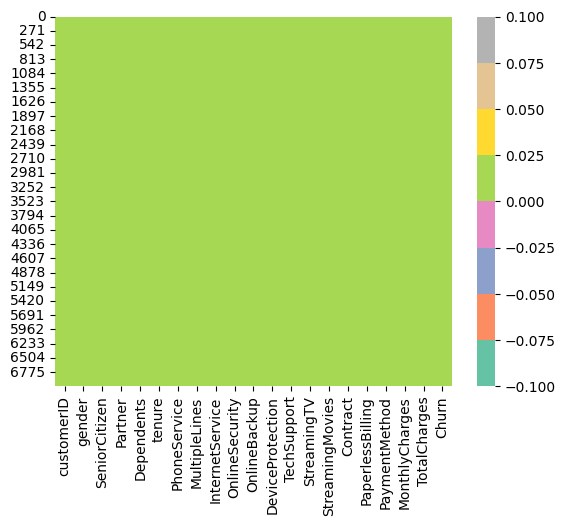

In [166]:
# visualise missing data
sns.heatmap(data.isna(), cmap="Set2")

<Axes: >

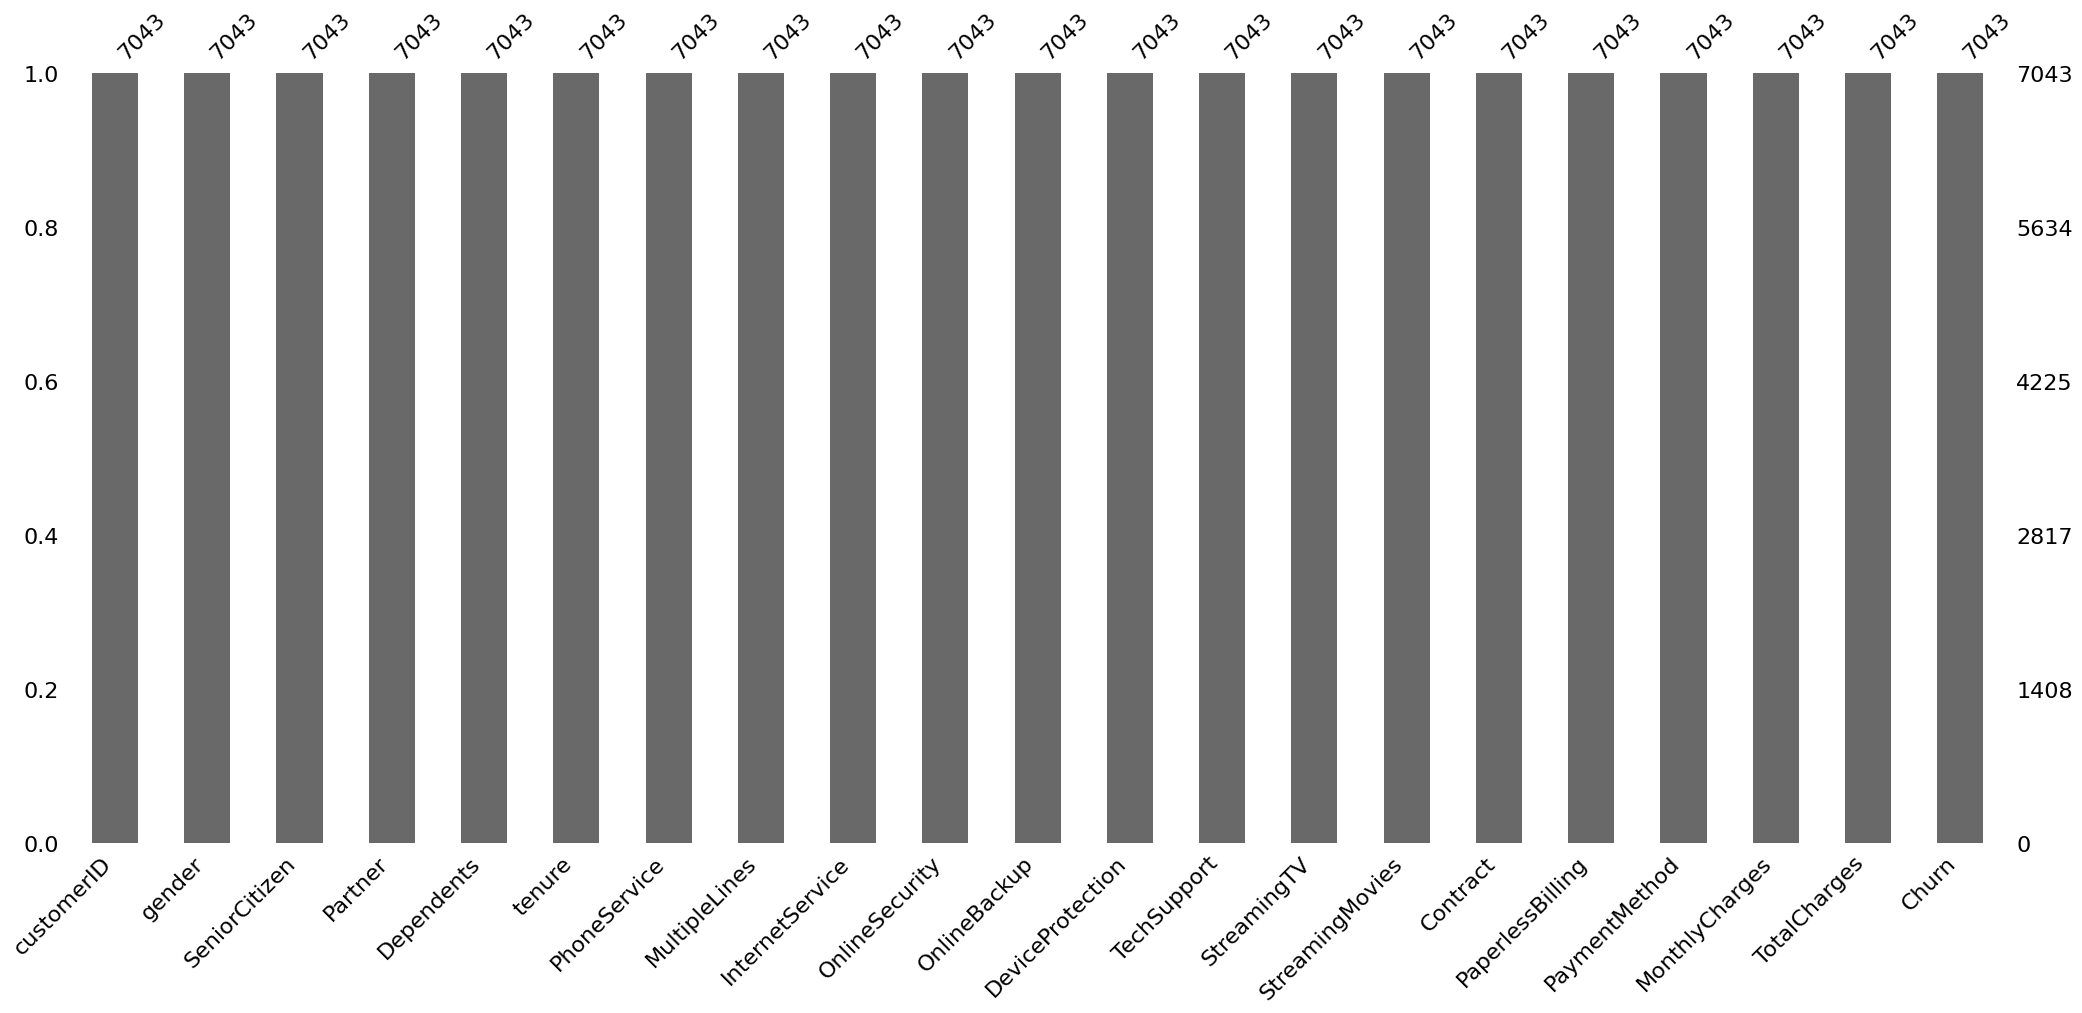

In [167]:
msn.bar(data)

In [78]:
# Narration: From the chats above, it is clear that there is no missing values.

## Check for Duplicates

In [168]:
data.duplicated().sum()

0

In [80]:
# Narration: There is no duplicates in the dataset.

## Drop Irrelevant columns

In [169]:
data = data.drop(["customerID"],axis=1)

In [170]:
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Exploratory Data Analysis

In [171]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='tenure'>

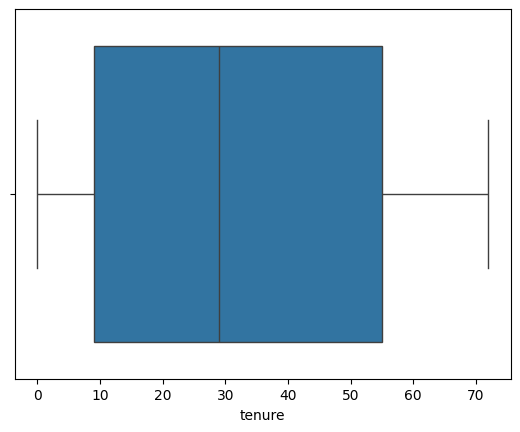

In [172]:
# check for outliers
sns.boxplot(x=data["tenure"])

<Axes: xlabel='MonthlyCharges'>

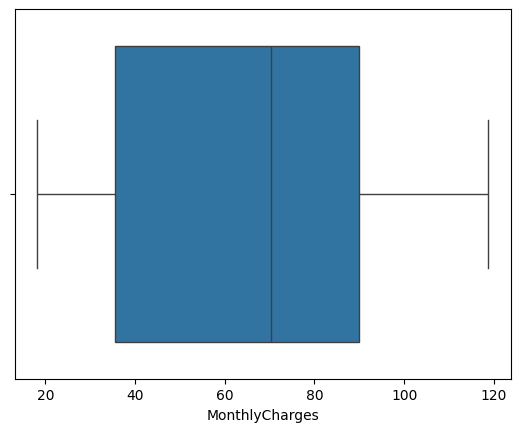

In [173]:
# check for outliers
sns.boxplot(x=data["MonthlyCharges"])

In [174]:
# summary of statistical data
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [175]:
# Summary of categorical data
data.describe(include=["object"])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [88]:
## Numerical Exploratory Data Analysis

In [176]:
numerical_df = data.select_dtypes(exclude=["object"])

In [177]:
numerical_df.head(3)

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85


## Univariate Analysis on Numerical Data

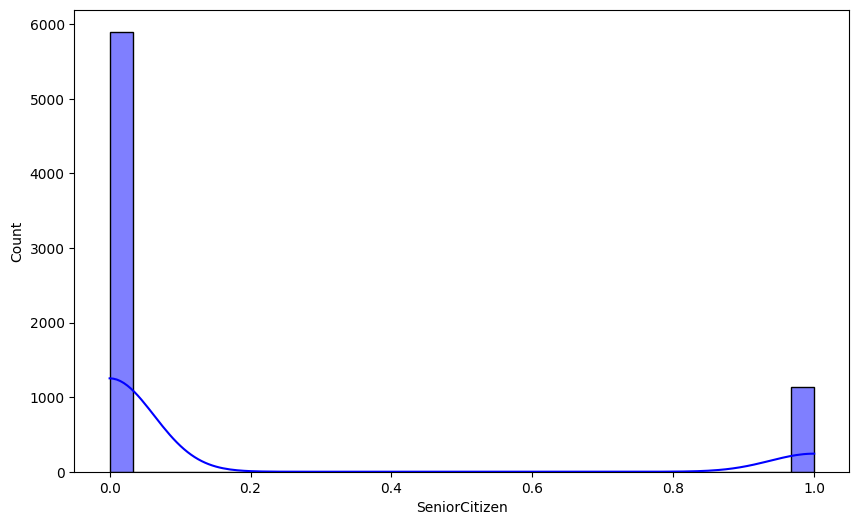

In [179]:
# Analysis of individual columns
plt.figure(figsize=(10,6))
sns.histplot(numerical_df["SeniorCitizen"], bins=30, color="blue", kde=True);
plt.savefig("SeniorCitizen.png", transparent=True)

<function matplotlib.pyplot.show(close=None, block=None)>

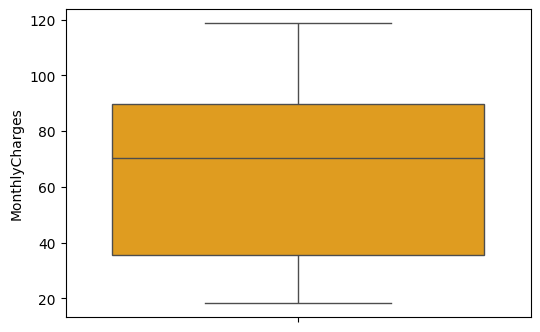

In [180]:
plt.figure(figsize=(6,4))
sns.boxplot(numerical_df["MonthlyCharges"], color="orange");
plt.show

In [93]:
# Narration: The company's monthly charges are between 29 to 90

<Axes: ylabel='tenure'>

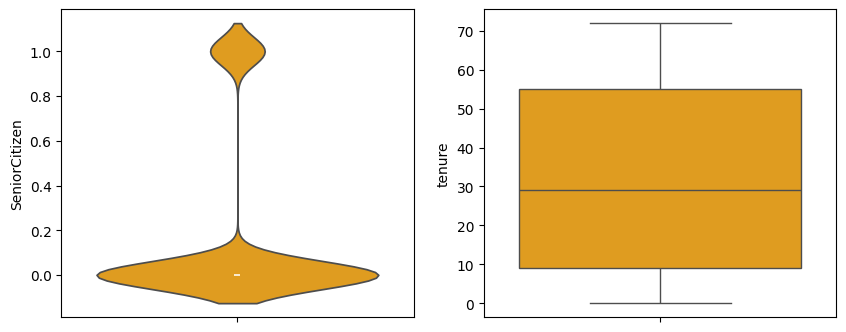

In [181]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.violinplot(numerical_df["SeniorCitizen"], color="orange", ax=axes[0])
sns.boxplot(numerical_df["tenure"], color="orange", ax=axes[1])

In [95]:
# Narration: The plot above shows that the customers longevity/tenure with the company is between 10 years to 55 years while the violin plot 
# show that majority of the customers centered on 0 which is Not senior citizen than yes.

In [182]:
numerical_cols = numerical_df.columns.to_list()
numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges']

## Univariate Analysis on Categorical Data

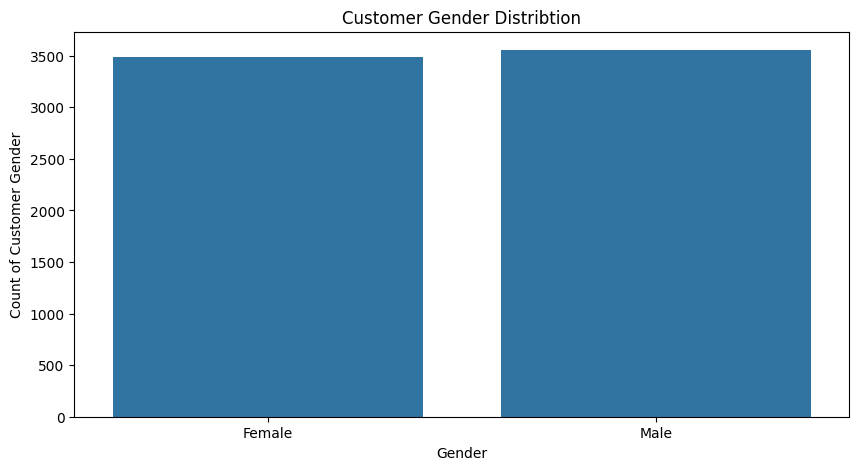

In [188]:
# visualizing the gender column

plt.figure(figsize=(10,5))
sns.countplot(x="gender", data=data)
plt.xlabel("Gender")
plt.ylabel("Count of Customer Gender")
plt.title("Customer Gender Distribtion")
plt.savefig("Customer Gender Distribtion.png", transparent=True)

In [98]:
# Narration: The above plot shows that the gender of customers are uniformly distributed

In [189]:
categorical_df = data.select_dtypes(include="object")
categorical_df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


Text(0.5, 1.0, 'Customer Partner Distribution')

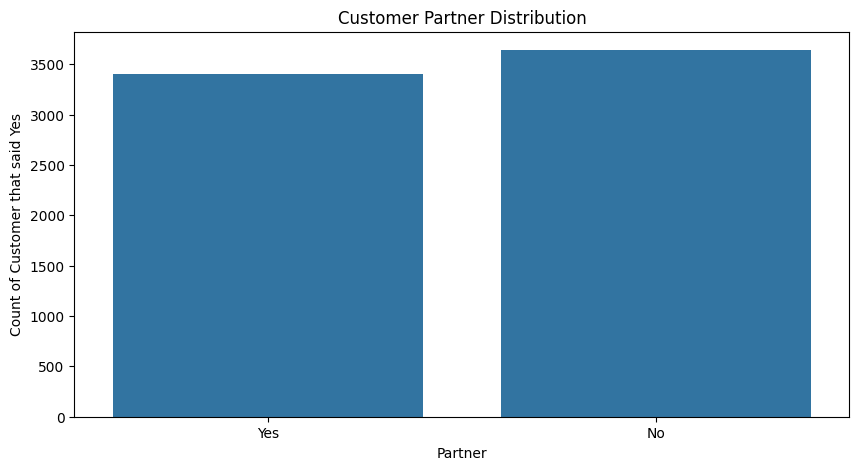

In [190]:
# To check the number of customers that answered yes or no in partner column

plt.figure(figsize=(10,5))
sns.countplot(x="Partner", data=data)
plt.xlabel("Partner")
plt.ylabel("Count of Customer that said Yes")
plt.title("Customer Partner Distribution")

In [101]:
# Narration: The plot above showed that most of the customers does not have partner

Text(0.5, 1.0, 'Customers with or without Dependents')

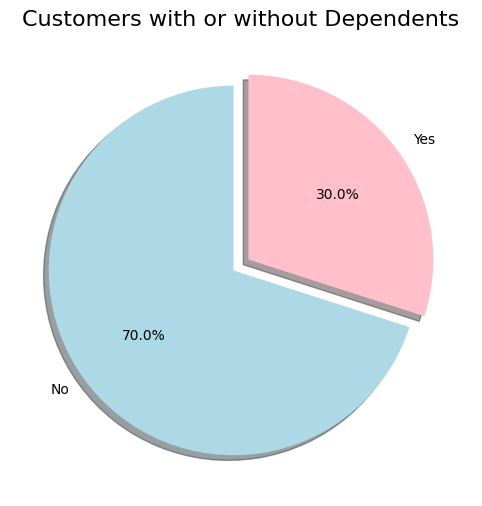

In [199]:
# Calculate the Customers with or without Dependents 
Dependents_counts = data['Dependents'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(Dependents_counts, labels=Dependents_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['lightblue', 'pink'], explode=[0.05, 0.05],
        shadow=True)

# Adding title
plt.title('Customers with or without Dependents', fontsize=16)

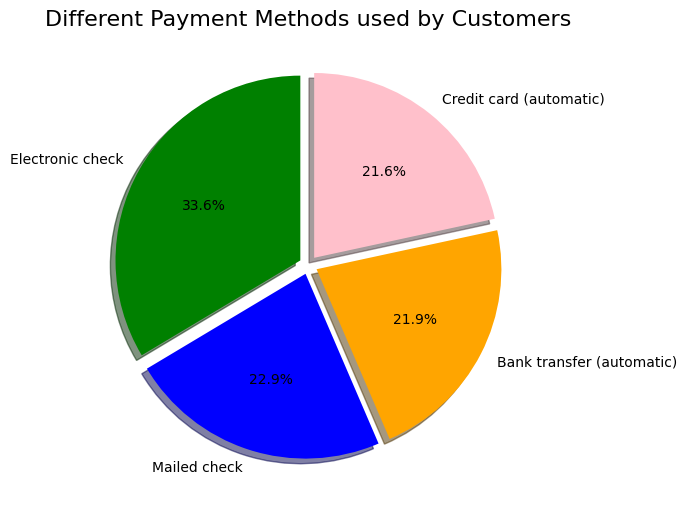

In [195]:
# check the different payment methods used 

PaymentMethod_counts = data['PaymentMethod'].value_counts()

# Create a dynamic explode array
explode = [0.05] * len(PaymentMethod_counts)  # Explode all slices slightly

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(PaymentMethod_counts, labels=PaymentMethod_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['green', 'blue', 'orange', 'pink'], explode=explode,
        shadow=True)

# Adding title
plt.title('Different Payment Methods used by Customers', fontsize=16)
plt.savefig("payment methods used bt Customers.png", transparent=True)

In [105]:
# Narration: The most preferred methos of payment by customers was Electronic check, there is little difference in the 
# percentage of the use of bank transfer, credit card and mailed check methods of payment.

Text(0.5, 1.0, 'Different InternetService Subscribed by the Customers')

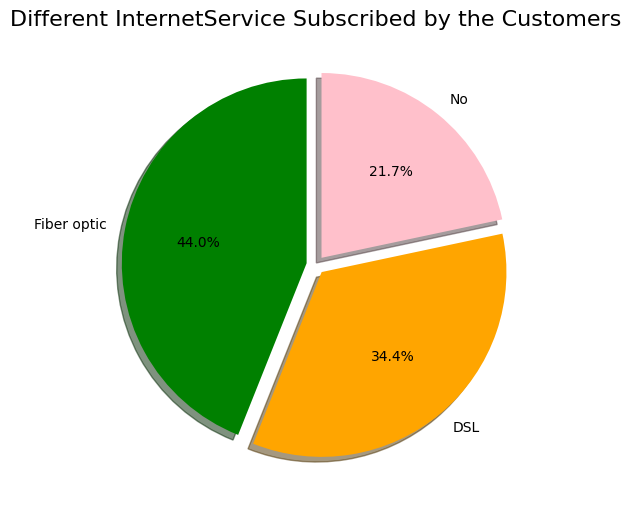

In [200]:
# check the different types of internet services subscribed by the customers
InternetService_counts = data['InternetService'].value_counts()

# Create a dynamic explode array
explode = [0.05] * len(InternetService_counts)  # Explode all slices slightly

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(InternetService_counts, labels=InternetService_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['green', 'orange', 'pink'], explode=explode,
        shadow=True)

# Adding title
plt.title('Different InternetService Subscribed by the Customers', fontsize=16)

In [107]:
# Narration: Customers subscribed mostly fiber and DSL. 21% of customers does not subscribe to internet services.

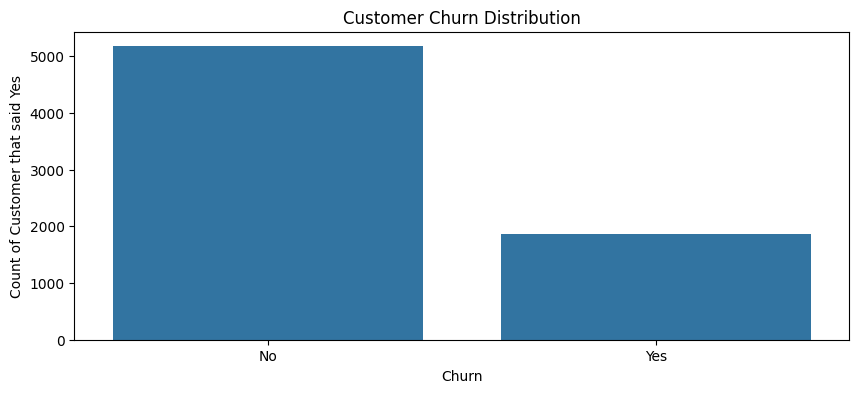

In [201]:
# Check the total number of customer by churn

plt.figure(figsize=(10,4))
sns.countplot(x="Churn", data=data)
plt.xlabel("Churn")
plt.ylabel("Count of Customer that said Yes")
plt.title("Customer Churn Distribution")
plt.savefig("Churn Distribution.jpg", transparent=True)

In [109]:
# Narration: from the plot above, 2000 customer are churn

In [204]:
categorical_df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


## Bivariate Analysis

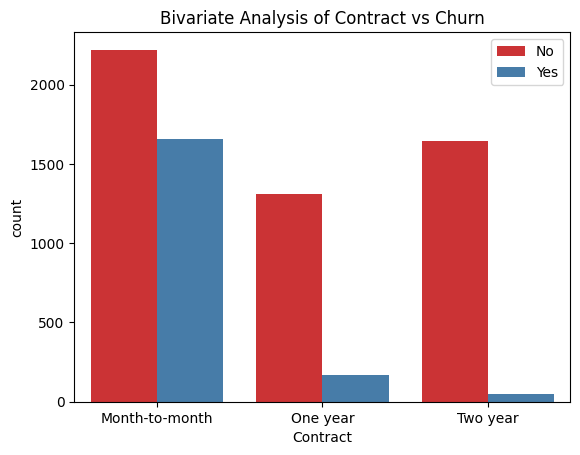

<Figure size 640x480 with 0 Axes>

In [205]:
# visualization of categorical data

sns.countplot(x="Contract", hue="Churn", data=categorical_df, palette="Set1")
plt.title(f"Bivariate Analysis of Contract vs Churn")
plt.legend(loc="upper right")
plt.show()
plt.savefig("Bivariate Analysis of Contract vs Churn.png", transparent=True)

In [112]:
# Narration: From the plot above, it is clear that customers who are churn are mostly on month to month contract, 
# while very few customers on one year and two years contract are churn.

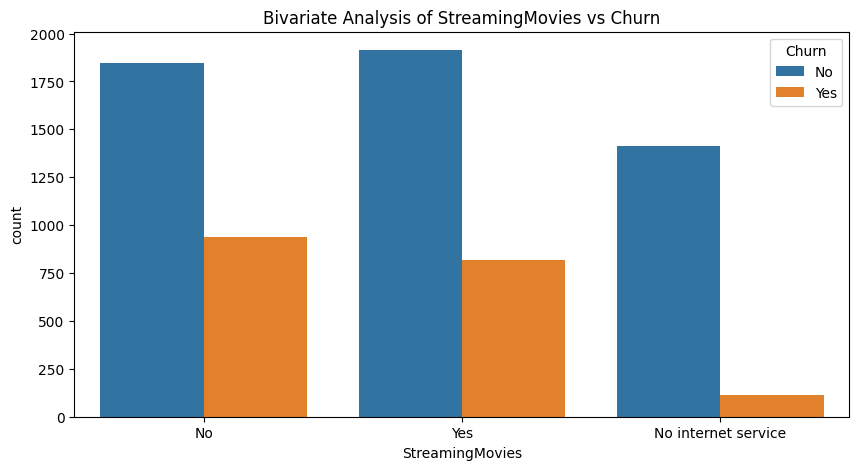

In [206]:
 # Investigating streamingmovies column by churn column

plt.figure(figsize=(10,5))
sns.countplot(x="StreamingMovies", data=categorical_df, hue="Churn")
plt.title("Bivariate Analysis of StreamingMovies vs Churn");

In [114]:
# Narration: There is no much relationship between custers that are streaming movies and those that does not stream movies with churn.

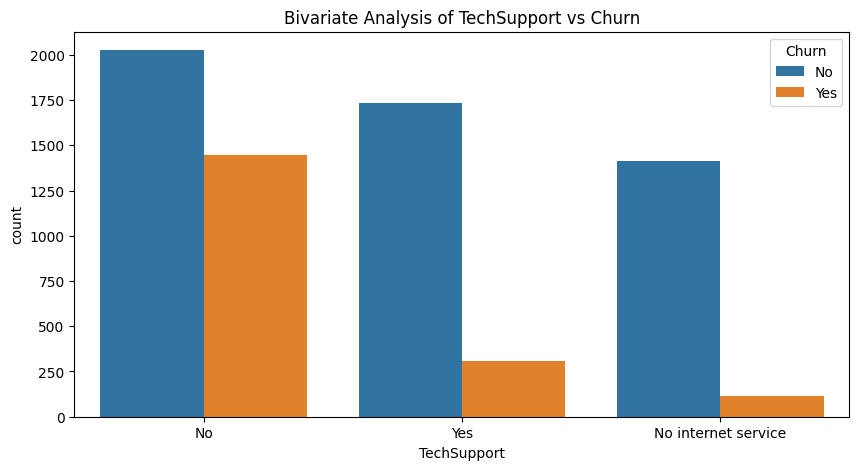

In [207]:
 # Investigating the TechSupport by Churn column

plt.figure(figsize=(10,5))
sns.countplot(x="TechSupport", data=categorical_df, hue="Churn")
plt.title("Bivariate Analysis of TechSupport vs Churn");
plt.savefig("Bivariate Analysis of Techsupport vs Churn.png", transparent=True)

In [116]:
# Narration from the plot above, customer attrittion is mostly on customers that does not have technical support

Text(0.5, 1.0, 'Bivariate Analysis of DeviceProtection vs Churn')

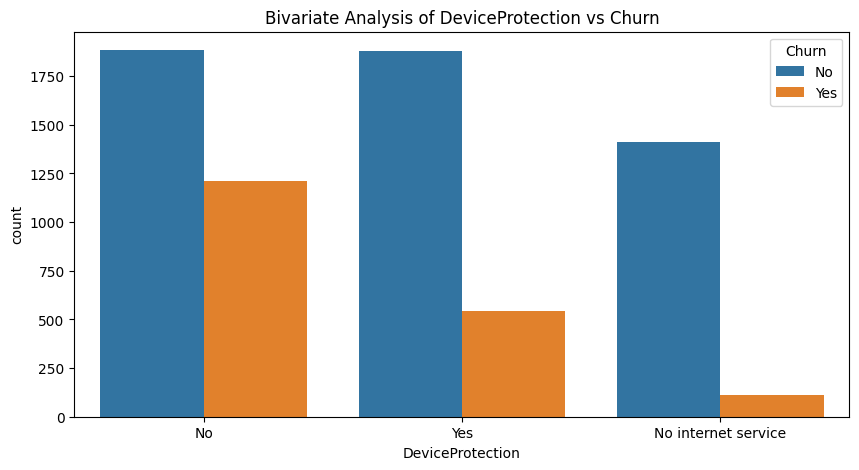

In [208]:
 # Investigating the OnlineBackup by DeviceProtection column

plt.figure(figsize=(10,5))
sns.countplot(x="DeviceProtection", data=categorical_df, hue="Churn")
plt.title("Bivariate Analysis of DeviceProtection vs Churn")

In [118]:
# Narration: Most of the cutomers who are churn does not not have device protection.

Text(0.5, 1.0, 'Bivariate Analysis of MultipleLines vs Churn')

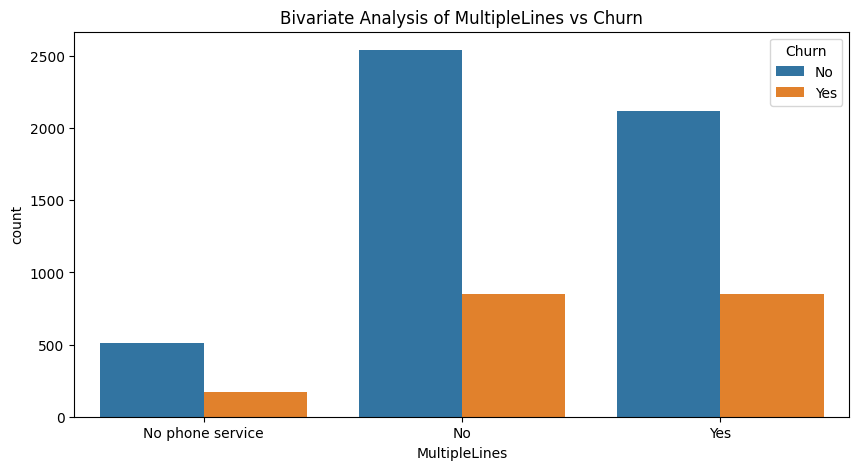

In [209]:
 # Investigating the MultipleLines by DeviceProtection column

plt.figure(figsize=(10,5))
sns.countplot(x="MultipleLines", data=categorical_df, hue="Churn")
plt.title("Bivariate Analysis of MultipleLines vs Churn")

## Multivariate Analysis

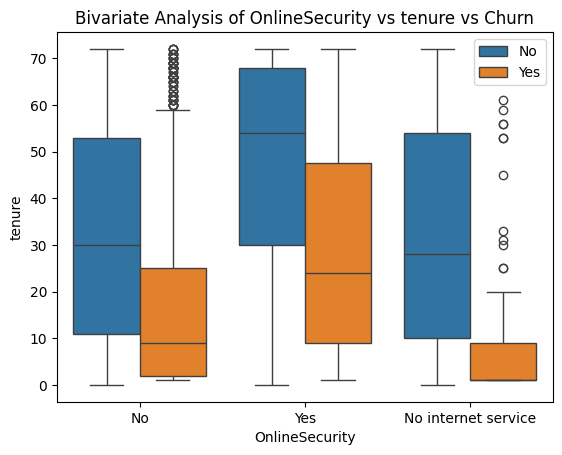

<Figure size 640x480 with 0 Axes>

In [211]:
# Comparing the relationship betweeen PhoneService, InternetService and churn

sns.boxplot(x="OnlineSecurity", y="tenure", hue="Churn", data=data)
plt.title(f"Bivariate Analysis of OnlineSecurity vs tenure vs Churn")
plt.legend(loc="upper right")
plt.show()
plt.savefig("Bivariate Analysis of Online Security vs Tenure vs Churn.png", transparent=True)

In [212]:
categorical_df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


## Correlation Map

In [213]:
numerical_df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


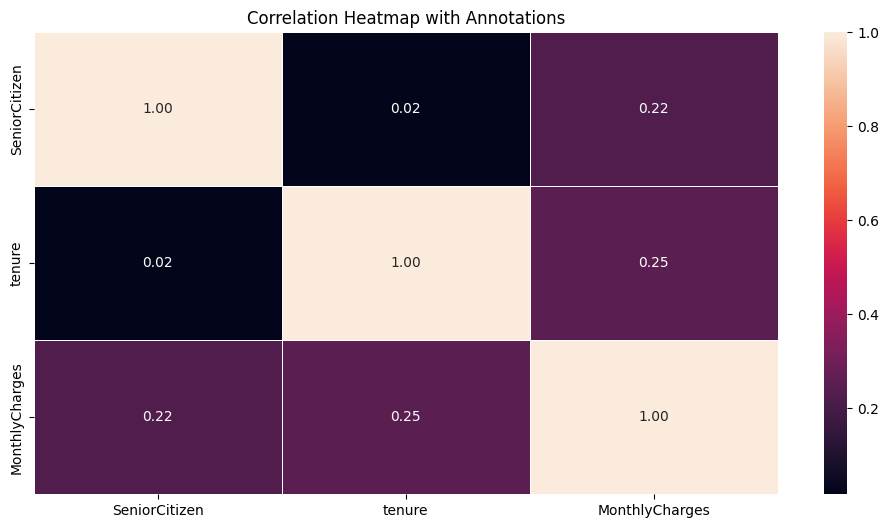

In [215]:
plt.figure(figsize=(12,6))

sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Heatmap with Annotations')
plt.savefig("Correlation Heatmap of Statistical columns.png", transparent=True)

## Data Pre-processing

In [216]:
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [218]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit the encoder and transform the 'Churn' column
data['Churn'] = encoder.fit_transform(data['Churn'])

# Check the first few rows of the DataFrame to ensure the conversion was successful
print(data['Churn'].head())

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


In [219]:
# Questions <===> Features
# Answers <====> labels
# seperate features from labels

labels = data["Churn"]
labels

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [221]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [222]:
# Convert the categorical target column to numerical values
encoder = LabelEncoder()
data['Churn'] = encoder.fit_transform(data['Churn'])  # 'Yes' becomes 1, 'No' becomes 0

In [223]:
# Convert 'TotalCharges' column to numeric, force errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check if there are any NaN values (which were non-numeric)
print(data['TotalCharges'].isnull().sum())

# Optionally, you can fill NaN values with the median, mean, or drop them
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Verify that 'TotalCharges' is now in float format
print(data['TotalCharges'].dtype)

11
float64


In [224]:
# seperate features columns from label column
# since its only one column, its best to drop it

features = data.drop("Churn", axis=1)
features.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15


## Encoding Categorical Features

In [225]:
categorical_df.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes


In [132]:
encoder = LabelEncoder()

In [226]:
encoder.fit(data["PhoneService"])

LabelEncoder()

In [227]:
# Fit and transform categorical columns
encoder.fit_transform(data["gender"])

array([0, 1, 1, ..., 0, 1, 1])

In [228]:
# To check which of the numbers are assigned to which variable

encoder.inverse_transform([0,1])

array(['Female', 'Male'], dtype=object)

In [229]:
encoder.fit_transform(data["Partner"])

array([1, 0, 0, ..., 1, 1, 0])

In [230]:
categorical_df= data.drop("Churn", axis=1)
categorical_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15


In [231]:
# check names of the columns in the dataset

for column_name in categorical_df:
    print(column_name)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges


In [232]:
# convert categorical value to numerical form, use for loop function

for column_name in categorical_df:
    features[column_name] = encoder.fit_transform(features[column_name])

In [233]:
# Now, apply scaling to all numerical columns
scaler = MinMaxScaler()

# Select only numerical columns for scaling
numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns

# Apply the scaler to the numerical columns
features[numerical_cols] = scaler.fit_transform(features[numerical_cols])

print(features.head())

   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0            0.0        1           0  0.013889             0   
1       1            0.0        0           0  0.472222             1   
2       1            0.0        0           0  0.027778             1   
3       1            0.0        0           0  0.625000             0   
4       0            0.0        0           0  0.027778             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1     

In [234]:
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0.0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.089646,0.011332
1,1,0.0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.314394,0.555130
2,1,0.0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.275253,0.082083
3,1,0.0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.167929,0.546861
4,0,0.0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.460227,0.103216


## Data Splitting

In [235]:
data["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [236]:
# Split the data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [237]:
train_features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0.0,0,1,0.291667,1,0,0,2,0,2,0,0,2,1,0,3,0.394571,0.455130
1623,0,0.0,0,0,0.750000,1,2,1,0,2,0,0,2,2,2,1,0,0.776515,0.835988
6074,1,0.0,1,0,0.013889,0,1,0,0,0,0,0,0,0,0,1,2,0.039141,0.006891
1362,1,0.0,0,0,0.055556,1,0,1,0,0,0,0,0,0,0,1,2,0.453914,0.147933
6754,1,0.0,0,1,0.000000,1,2,0,2,2,0,2,0,0,2,1,0,0.365530,0.469372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0.0,1,0,0.013889,1,0,1,2,0,0,0,2,2,0,1,2,0.750000,0.074426
5191,0,0.0,1,1,0.319444,1,2,0,2,2,2,2,2,2,2,1,1,0.703914,0.589433
5226,1,0.0,1,1,0.166667,1,0,2,1,1,1,1,1,1,0,1,2,0.032828,0.177029
5390,1,1.0,0,0,0.166667,1,2,1,0,0,2,0,2,2,0,1,2,0.801768,0.422971


In [238]:
test_features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0.0,1,0,0.013889,0,1,0,0,0,0,0,0,0,0,1,2,0.055556,0.008423
2715,1,0.0,0,0,0.569444,1,2,2,1,1,1,1,1,1,0,1,0,0.061237,0.375957
3825,0,0.0,1,1,0.722222,1,0,2,1,1,1,1,1,1,2,0,3,0.010101,0.385299
1807,0,0.0,0,0,0.013889,1,0,1,0,0,2,0,0,0,0,0,2,0.526515,0.055283
132,1,0.0,0,0,0.930556,1,0,0,0,0,0,2,0,0,2,0,0,0.244318,0.690658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0,0.0,1,0,0.888889,1,0,0,0,2,2,2,0,2,2,1,3,0.429924,0.779632
315,1,0.0,1,1,0.708333,1,2,1,2,2,0,2,2,2,1,0,1,0.928030,0.871822
2439,1,0.0,1,1,0.236111,1,0,2,1,1,1,1,1,1,1,0,0,0.017045,0.186217
5002,0,0.0,1,1,0.958333,0,1,0,2,0,2,0,0,2,2,1,1,0.179293,0.661868


In [239]:
len(features)

7043

In [240]:
len(train_features)

5634

In [241]:
len(test_features)

1409

In [242]:
# To reduce the stress of typing long name, i will represent features and labels with x and y
# features <=====> X
# labels <=======> y


Xtrain, Xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.2, random_state=42)

In [243]:
# Standardize the features
# 1. Standardize the features (Xtrain, Xtest)
scaler = MinMaxScaler()

# Fit on the training data and transform both train and test data
Xtrain_scaled = scaler.fit_transform(Xtrain)  # Fit and transform Xtrain
Xtest_scaled = scaler.transform(Xtest)        # Only transform Xtest (using the fitted scaler)

# 2. Apply MinMaxScaler to individual columns of the data DataFrame
data['scaled_tenure'] = scaler.fit_transform(data['tenure'].values.reshape(-1, 1))
data["scaled_MonthlyCharges"] = scaler.fit_transform(data[["MonthlyCharges"]].values.reshape(-1, 1))
data["scaled_TotalCharges"] = scaler.fit_transform(data[["TotalCharges"]].values.reshape(-1, 1))

# 3. Drop the original columns after scaling
data.drop(["tenure", "MonthlyCharges", "TotalCharges"], axis=1, inplace=True)

# Check the first few rows of the modified dataset
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,scaled_tenure,scaled_MonthlyCharges,scaled_TotalCharges
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0,0.013889,0.115423,0.001275
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0,0.472222,0.385075,0.215867
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1,0.027778,0.354229,0.010310
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0,0.625000,0.239303,0.210241
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1,0.027778,0.521891,0.015330


In [245]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
ypred = model.fit(Xtrain, ytrain)

In [247]:
# Make predictions on the test set

ypred_numeric = model.predict(Xtest)

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit the encoder and transform y_pred
ypred_numeric = encoder.fit_transform(ypred_numeric)

# Print the transformed y_pred to check
print(ypred_numeric)

ypred_numeric = model.predict(Xtest)

[1 0 0 ... 0 0 0]


## Model Evaluation

In [248]:
# Evaluate Accuracy Score

accuracy = accuracy_score(ytest, ypred_numeric)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 79.70%


In [249]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_numeric)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[946  90]
 [196 177]]


<Axes: >

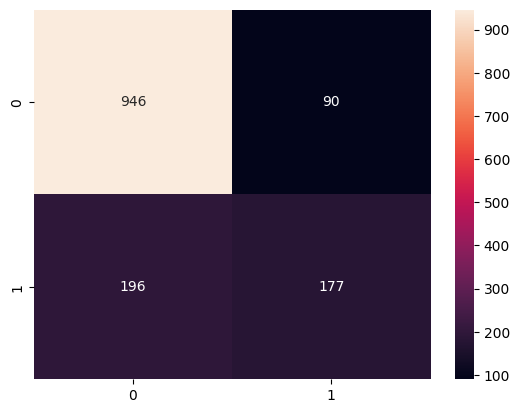

In [250]:
sns.heatmap(conf_matrix, annot=True, fmt="g")

In [251]:
# Generate classification report
class_report = classification_report(ytest, ypred_numeric)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.79      1409



## Improving the model from the model size

In [252]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model on the training set
log_reg.fit(Xtrain_scaled, ytrain)

LogisticRegression(random_state=42)

In [253]:
# Predict the test set results
ypred_numeric = log_reg.predict(Xtest_scaled)

In [255]:
# Evaluate the model
accuracy = accuracy_score(ytest, ypred_numeric)
print(f"Accuracy: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(ytest, ypred_numeric)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(ytest, ypred_numeric)
print("Classification Report:")
print(class_report)

Accuracy: 81.62%
Confusion Matrix:
[[937  99]
 [160 213]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



<Axes: >

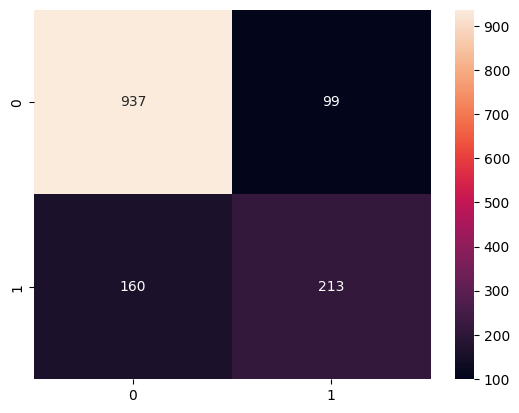

In [256]:
sns.heatmap(conf_matrix, annot=True, fmt="g")

In [257]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,scaled_tenure,scaled_MonthlyCharges,scaled_TotalCharges
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0,0.013889,0.115423,0.001275
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0,0.472222,0.385075,0.215867
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1,0.027778,0.354229,0.010310
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0,0.625000,0.239303,0.210241
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1,0.027778,0.521891,0.015330


In [258]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit the encoder and transform the 'Churn' column
data['Churn'] = encoder.fit_transform(data['Churn'])

# Check the first few rows of the DataFrame to ensure the conversion was successful
print(data['Churn'].head())

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


Accuracy: 72.11%
Confusion Matrix:
[[692 344]
 [ 49 324]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      1036
           1       0.49      0.87      0.62       373

    accuracy                           0.72      1409
   macro avg       0.71      0.77      0.70      1409
weighted avg       0.82      0.72      0.74      1409



<Axes: >

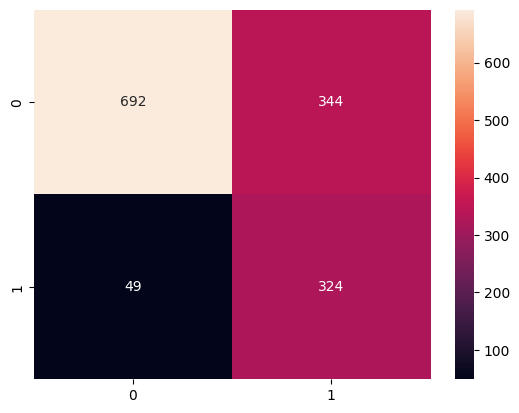

In [259]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, class_weight={0:1, 1:4})

# Train the model on the training set
log_reg.fit(Xtrain_scaled, ytrain)

# Predict the test set results
y_pred_numeric = log_reg.predict(Xtest_scaled)

# Evaluate the model
accuracy = accuracy_score(ytest, y_pred_numeric)
print(f"Accuracy: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(ytest, y_pred_numeric)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(ytest, y_pred_numeric)
print("Classification Report:")
print(class_report)

sns.heatmap(conf_matrix, annot=True, fmt="g")

## Improve the Model Performance

In [260]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [263]:
classifiers = [
    [LogisticRegression(random_state=42, class_weight={0:1, 1:4}), "Logistic Regression"],
    [SGDClassifier(random_state=42, class_weight={0:1, 1:4}), "SGD Classifer"],
    [DecisionTreeClassifier(random_state=42, class_weight={0:1, 1:4}), "Decision tree"],
    [RandomForestClassifier(random_state=42, class_weight={0:1, 1:4}), "Random Forest"],
    ]

<---Logistic Regression--->
              precision    recall  f1-score   support

           0    0.93387   0.66795   0.77884      1036
           1    0.48503   0.86863   0.62248       373

    accuracy                        0.72108      1409
   macro avg    0.70945   0.76829   0.70066      1409
weighted avg    0.81505   0.72108   0.73745      1409



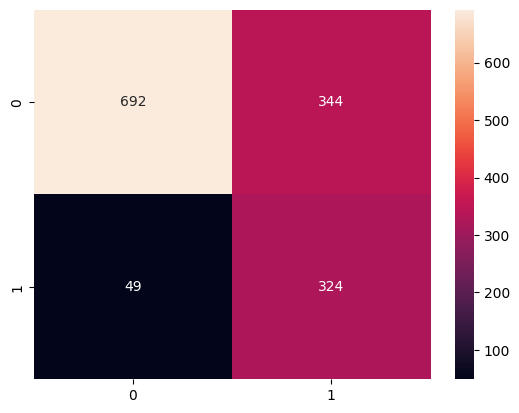

<---SGD Classifer--->
              precision    recall  f1-score   support

           0    0.95857   0.49131   0.64965      1036
           1    0.39977   0.94102   0.56115       373

    accuracy                        0.61036      1409
   macro avg    0.67917   0.71617   0.60540      1409
weighted avg    0.81064   0.61036   0.62622      1409



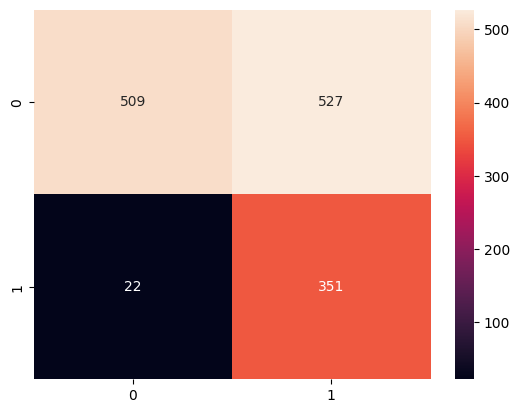

<---Decision tree--->
              precision    recall  f1-score   support

           0    0.81094   0.81564   0.81328      1036
           1    0.47956   0.47185   0.47568       373

    accuracy                        0.72463      1409
   macro avg    0.64525   0.64374   0.64448      1409
weighted avg    0.72322   0.72463   0.72391      1409



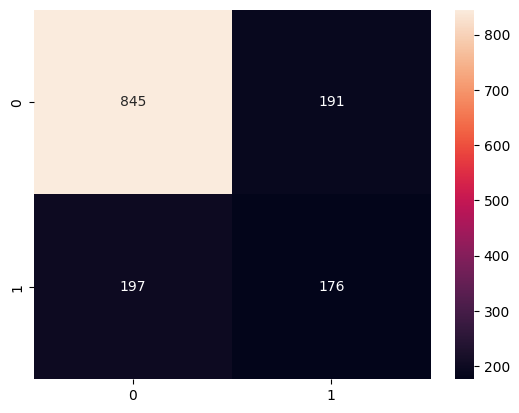

<---Random Forest--->
              precision    recall  f1-score   support

           0    0.82582   0.91988   0.87032      1036
           1    0.67451   0.46113   0.54777       373

    accuracy                        0.79844      1409
   macro avg    0.75017   0.69051   0.70905      1409
weighted avg    0.78577   0.79844   0.78493      1409



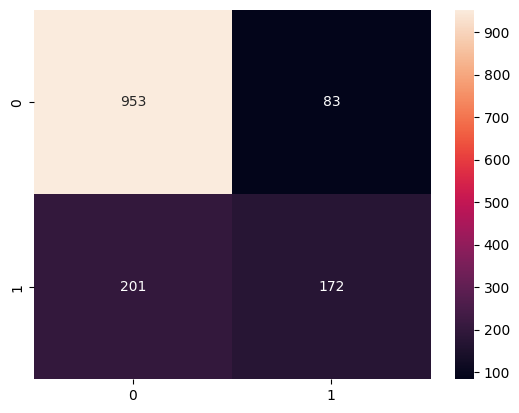

In [264]:
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f"<---{model_name}--->")
    # Training
    model.fit(Xtrain_scaled, ytrain)
    # Prediction
    predictions = model.predict(Xtest_scaled)
    report = classification_report(ytest, predictions, digits=5)
    print(report)
    matrix = confusion_matrix(ytest, predictions)
    sns.heatmap(matrix, annot=True, fmt="g")
    plt.show()

In [265]:
Xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0.0,0,1,0.291667,1,0,0,2,0,2,0,0,2,1,0,3,0.394571,0.455130
1623,0,0.0,0,0,0.750000,1,2,1,0,2,0,0,2,2,2,1,0,0.776515,0.835988
6074,1,0.0,1,0,0.013889,0,1,0,0,0,0,0,0,0,0,1,2,0.039141,0.006891
1362,1,0.0,0,0,0.055556,1,0,1,0,0,0,0,0,0,0,1,2,0.453914,0.147933
6754,1,0.0,0,1,0.000000,1,2,0,2,2,0,2,0,0,2,1,0,0.365530,0.469372


In [266]:
classifiers[3][0]

RandomForestClassifier(class_weight={0: 1, 1: 4}, random_state=42)

In [267]:
classifiers[3][0].feature_importances_

array([0.02506091, 0.01634266, 0.0213997 , 0.01957514, 0.1524618 ,
       0.00617976, 0.0208897 , 0.03038241, 0.05951278, 0.02620009,
       0.02085651, 0.04922788, 0.01753646, 0.01687881, 0.11581041,
       0.02448344, 0.04882273, 0.16020124, 0.16817757])

In [268]:
feature_names = Xtrain.columns

In [269]:
importances = classifiers[3][0].feature_importances_

In [270]:
feature_importance_df = pd.DataFrame({"features":feature_names, "importance":importances})

In [271]:
feature_importance_df

,features,importance
0,gender,0.025061
1,SeniorCitizen,0.016343
2,Partner,0.021400
3,Dependents,0.019575
4,tenure,0.152462
5,PhoneService,0.006180
6,MultipleLines,0.020890
7,InternetService,0.030382
8,OnlineSecurity,0.059513
9,OnlineBackup,0.026200


In [272]:
feature_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)

In [273]:
feature_importance_df

,features,importance
18,TotalCharges,0.168178
17,MonthlyCharges,0.160201
4,tenure,0.152462
14,Contract,0.115810
8,OnlineSecurity,0.059513
11,TechSupport,0.049228
16,PaymentMethod,0.048823
7,InternetService,0.030382
9,OnlineBackup,0.026200
0,gender,0.025061


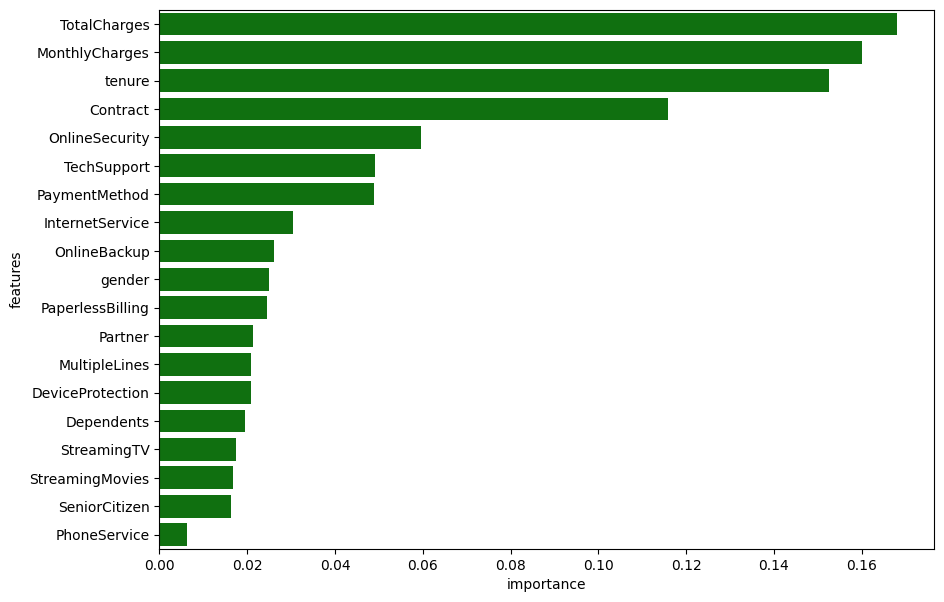

In [275]:
plt.figure(figsize=(10,7))
sns.barplot(x="importance", y="features", data=feature_importance_df, color="green")
plt.savefig("Features based on their importance to Churn.png", transparent=True)

In [276]:
top_5_features = list(feature_importance_df[:5]["features"].values)

In [277]:
top_5_features

['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'OnlineSecurity']

In [278]:
Xtrain[top_5_features]

,TotalCharges,MonthlyCharges,tenure,Contract,OnlineSecurity
2142,0.455130,0.394571,0.291667,1,2
1623,0.835988,0.776515,0.750000,2,0
6074,0.006891,0.039141,0.013889,0,0
1362,0.147933,0.453914,0.055556,0,0
6754,0.469372,0.365530,0.000000,2,2
...,...,...,...,...,...
3772,0.074426,0.750000,0.013889,0,2
5191,0.589433,0.703914,0.319444,2,2
5226,0.177029,0.032828,0.166667,0,1
5390,0.422971,0.801768,0.166667,0,0


In [279]:
Xtrain_top_5 = Xtrain[top_5_features]
Xtest_top_5 = Xtest[top_5_features]

In [280]:
Xtrain_top_5.head()

,TotalCharges,MonthlyCharges,tenure,Contract,OnlineSecurity
2142,0.455130,0.394571,0.291667,1,2
1623,0.835988,0.776515,0.750000,2,0
6074,0.006891,0.039141,0.013889,0,0
1362,0.147933,0.453914,0.055556,0,0
6754,0.469372,0.365530,0.000000,2,2


In [281]:
# Scale the data

scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain_top_5)
Xtest_scaled = scaler.transform(Xtest_top_5)

<---Logistic Regression--->
              precision    recall  f1-score   support

           0    0.94651   0.61486   0.74547      1036
           1    0.45788   0.90349   0.60775       373

    accuracy                        0.69127      1409
   macro avg    0.70219   0.75918   0.67661      1409
weighted avg    0.81716   0.69127   0.70901      1409



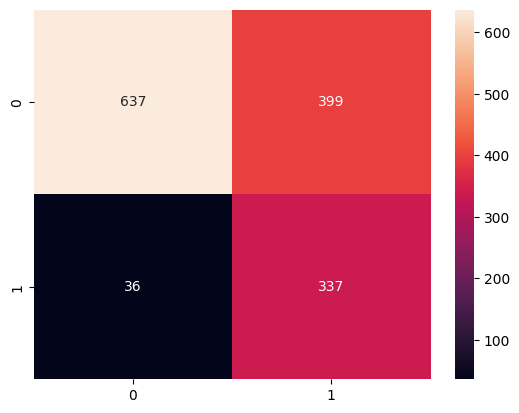

<---SGD Classifer--->
              precision    recall  f1-score   support

           0    0.97379   0.46622   0.63055      1036
           1    0.39430   0.96515   0.55988       373

    accuracy                        0.59830      1409
   macro avg    0.68405   0.71568   0.59521      1409
weighted avg    0.82038   0.59830   0.61184      1409



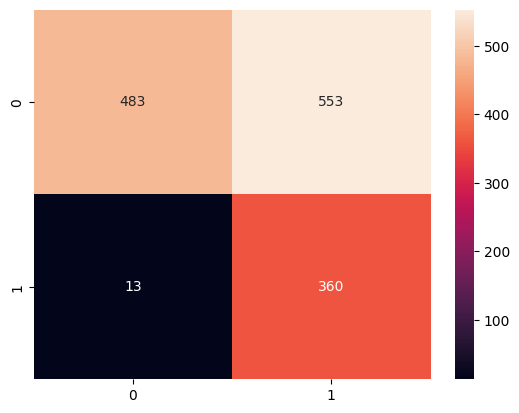

<---Decision tree--->
              precision    recall  f1-score   support

           0    0.81748   0.81274   0.81510      1036
           1    0.48813   0.49598   0.49202       373

    accuracy                        0.72889      1409
   macro avg    0.65280   0.65436   0.65356      1409
weighted avg    0.73029   0.72889   0.72957      1409



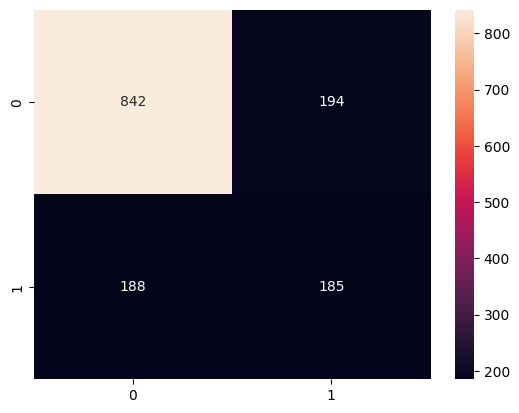

<---Random Forest--->
              precision    recall  f1-score   support

           0    0.82348   0.87355   0.84778      1036
           1    0.57742   0.47989   0.52416       373

    accuracy                        0.76934      1409
   macro avg    0.70045   0.67672   0.68597      1409
weighted avg    0.75834   0.76934   0.76211      1409



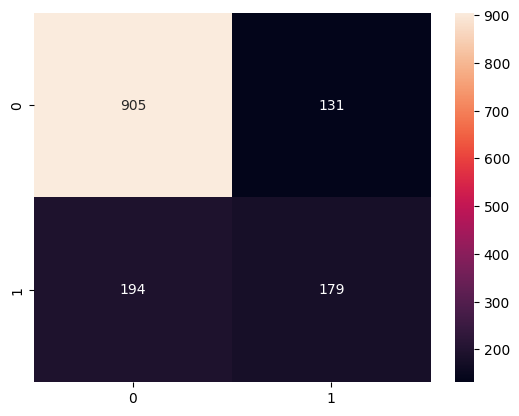

In [282]:
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f"<---{model_name}--->")
    # Training
    model.fit(Xtrain_scaled, ytrain)
    # Prediction
    predictions = model.predict(Xtest_scaled)
    report = classification_report(ytest, predictions, digits=5)
    print(report)
    matrix = confusion_matrix(ytest, predictions)
    sns.heatmap(matrix, annot=True, fmt="g")
    plt.show()